**Tarea 1**


1.   Para el problema de multi-armed bandit, implemente un banco de pruebas (testbed) similar al considerado en clase y en el libro de texto, pero con 15 acciones con 𝑞∗(𝑎𝑘) generadas aleatoriamente de acuerdo a una distribución normal con media 10 y varianza 4, y cada acción con varianza de 2.
Resuelva el problema de maximizar la suma de recompensas en un horizonte de tiempo de 5000 iteraciones con los siguientes algoritmos (implementados por usted):
- ϵ-greedy con recompensa promedio.
- Gradient Bandit.

Para cada caso ajuste apropiadamente los parámetros requeridos (𝛼,𝜖), y grafique el desempeño de los algoritmos en términos de recompensa recibida y porcentaje de iteraciones en que se selecciona la acción óptima.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##########################################################
# Valores que se dan en el enunciado
##########################################################

k = 15 #Numero de acciones
promedio = 10 # promedio q*(ak)
varianza_r = 4 # varainza q*(ak)
var_recompensa = 2 # varianza de las recompensas
iteraciones = 5000 # numero de iteraciones
num_experimentos = 1000 # numero de experimentos

##########################################################
# Funcion que genera valores de q*(ak)
##########################################################

def valores_verdaderos_q():
  return np.random.normal(promedio, np.sqrt(varianza_r), k)

##########################################################
# Funcion que genera valores de recompensa para el banco de pruebas
##########################################################

def valores_recompensa(q_valores_verdaderos, accion_tomada):
  return np.random.normal(q_valores_verdaderos[accion_tomada], np.sqrt(var_recompensa))

##########################################################
# Implementacion algoritmo epsilon-greedy
##########################################################

def epsilon_greedy(epsilon, alpha=None):
  # Se inicializa la recompensa y la acciones en cero
  recompensa_promedio = np.zeros(iteraciones)
  accion_optima_recuento = np.zeros(iteraciones)

  for experimento in range(num_experimentos):
    q_valores_verdaderos = valores_verdaderos_q()
    q_estimado = np.zeros(k) # valor inicial de las acciones
    recuento_acciones = np.zeros(k) # numero de veces que se selecciono la accion

    accion_optima = np.argmax(q_valores_verdaderos)

    #En esta parte se hace la seleccion de la accion que puede ser por explotacion o exploracion
    for t in range(iteraciones):
      if np.random.rand() < epsilon:
        accion = np.random.choice(k) # en esta parte se hace por exploracion
      else:
        accion = np.argmax(q_estimado) # en esta parte se hace por explotacion

      recompensa = valores_recompensa(q_valores_verdaderos, accion) # recompensa generada
      recuento_acciones[accion] += 1 # actualiza de recompensa de la accion

      if alpha is None:
        q_estimado[accion] += (recompensa - q_estimado[accion]) / recuento_acciones[accion] # para caso estacionario
      else:
        q_estimado[accion] += alpha*(recompensa-q_estimado[accion]) # para caso no estacionario en el que se quiere penalizar si varia en el tiempo

      recompensa_promedio[t] += recompensa
      if accion == accion_optima:
        accion_optima_recuento[t] += 1

  recompensa_promedio /= num_experimentos
  accion_optima_recuento /= num_experimentos

  return recompensa_promedio, accion_optima_recuento

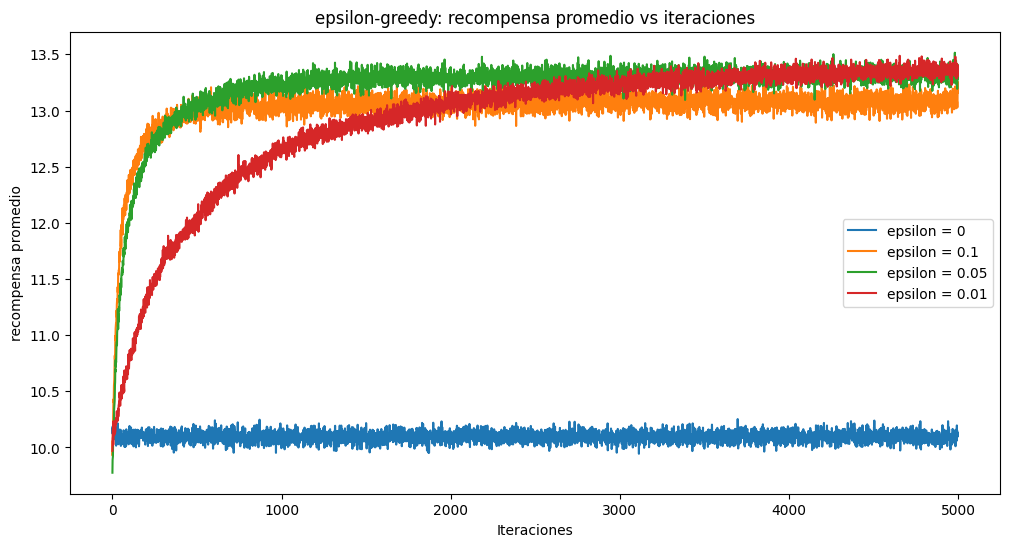

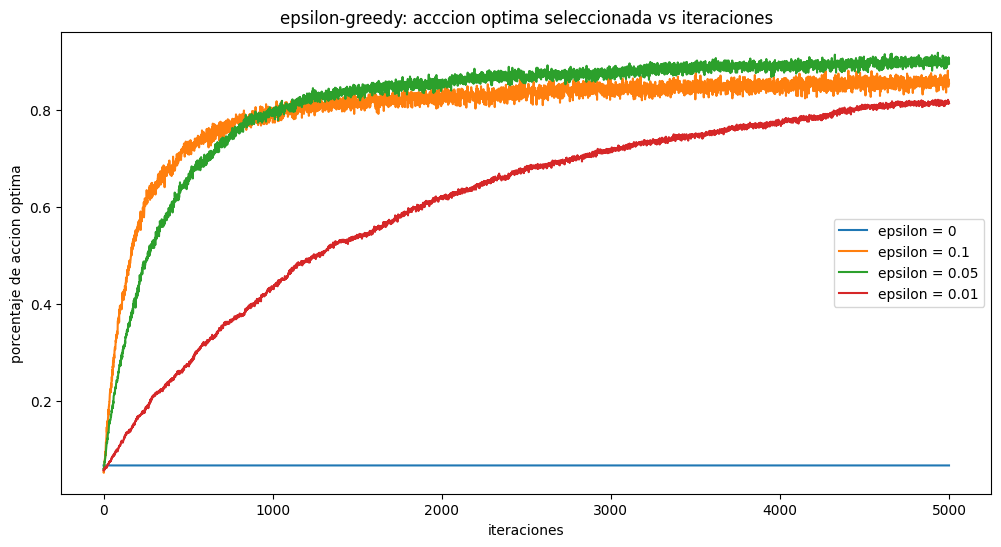

In [4]:
epsilons = [0, 0.1, 0.05, 0.01] # en esta parte se pueden cambiar los valores de epsilon
resultados = {}

for epsilon in epsilons:
    recompensa, conteo_acciones_optimas = epsilon_greedy(epsilon)
    resultados[epsilon] = (recompensa, conteo_acciones_optimas)

##########################################################
# Graficas de la recompensa y accion optima
##########################################################

plt.figure(figsize=(12, 6))

##########################################################
# recompensas
##########################################################

for epsilon in epsilons:
    plt.plot(resultados[epsilon][0], label=f'epsilon = {epsilon}')
plt.xlabel('Iteraciones')
plt.ylabel('recompensa promedio')
plt.title('epsilon-greedy: recompensa promedio vs iteraciones')
plt.legend()
plt.show()

##########################################################
# accion optima
##########################################################

plt.figure(figsize=(12, 6))
for epsilon in epsilons:
    plt.plot(resultados[epsilon][1], label=f'epsilon = {epsilon}')
plt.xlabel('iteraciones')
plt.ylabel('porcentaje de accion optima')
plt.title('epsilon-greedy: acccion optima seleccionada vs iteraciones')
plt.legend()
plt.show()


2.   Repita el problema anterior, pero ahora con cada acción con varianza 4.

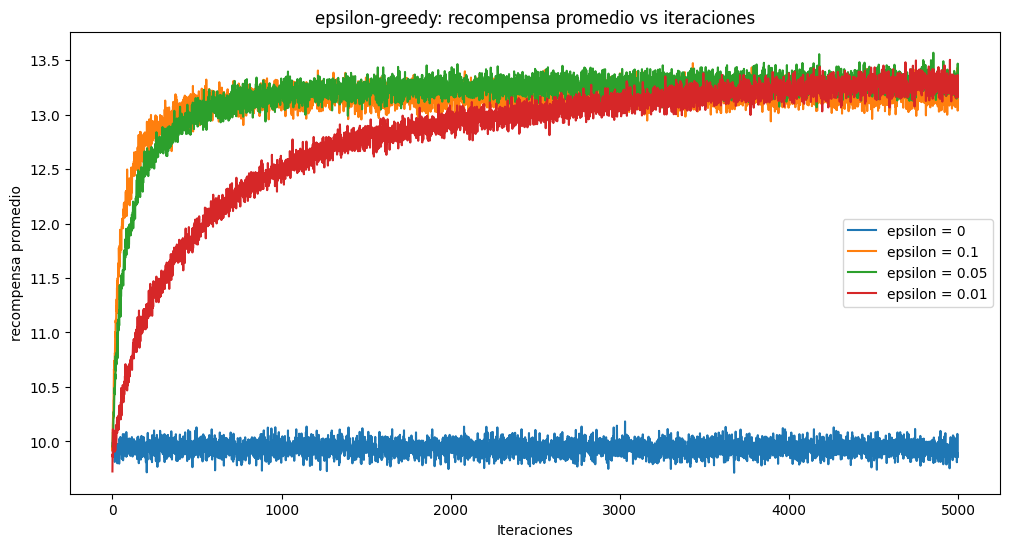

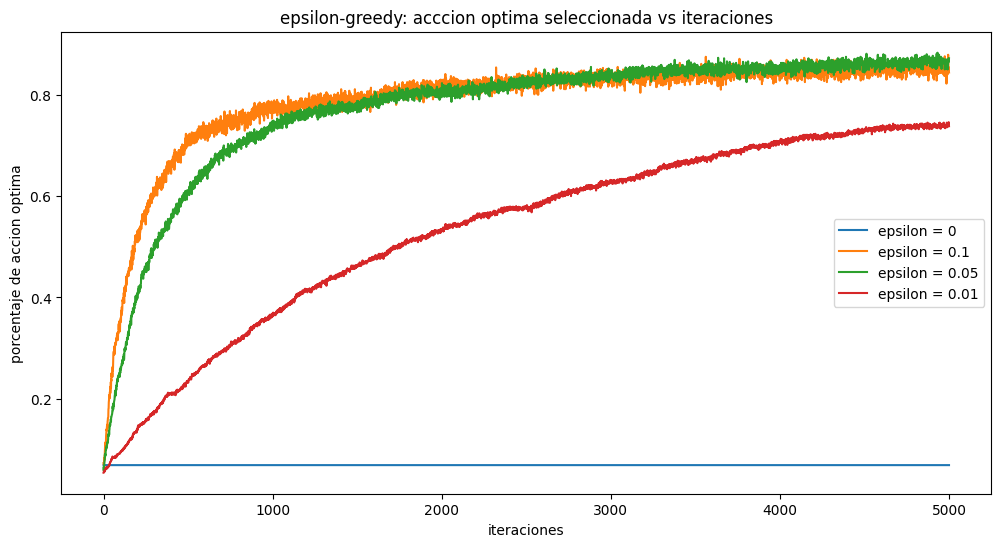

In [7]:

##########################################################
# Valores que se dan en el enunciado
##########################################################

k = 15 #Numero de acciones
promedio = 10 # promedio q*(ak)
varianza_r = 4 # varainza q*(ak)
var_recompensa = 4 # varianza de las recompensas
iteraciones = 5000 # numero de iteraciones
num_experimentos = 1000 # numero de experimentos

epsilons = [0, 0.1, 0.05, 0.01] # en esta parte se pueden cambiar los valores de epsilon
resultados = {}

for epsilon in epsilons:
    recompensa, conteo_acciones_optimas = epsilon_greedy(epsilon)
    resultados[epsilon] = (recompensa, conteo_acciones_optimas)

##########################################################
# Graficas de la recompensa y accion optima
##########################################################

plt.figure(figsize=(12, 6))

##########################################################
# recompensas
##########################################################

for epsilon in epsilons:
    plt.plot(resultados[epsilon][0], label=f'epsilon = {epsilon}')
plt.xlabel('Iteraciones')
plt.ylabel('recompensa promedio')
plt.title('epsilon-greedy: recompensa promedio vs iteraciones')
plt.legend()
plt.show()

##########################################################
# accion optima
##########################################################

plt.figure(figsize=(12, 6))
for epsilon in epsilons:
    plt.plot(resultados[epsilon][1], label=f'epsilon = {epsilon}')
plt.xlabel('iteraciones')
plt.ylabel('porcentaje de accion optima')
plt.title('epsilon-greedy: acccion optima seleccionada vs iteraciones')
plt.legend()
plt.show()
